# Gradient Descent

Gradient Descent is a process which tries to find the minimum point of a cost function by implanting small movements towards the direction of the steepest descent of the function. It is called an iterative optimization algorithm.

There are two specific requirements for gradient descent to be used on a function, it has to be both differentiable and convex.

The general formula for gradient descent is given by

$ \boxed{x^{(i)}_{n+1} = x^{(i)}_n - \alpha \dfrac{\partial F(x)}{\partial x^{i}} \biggr\rvert_{x_n}} $

or

$ \boxed{\textbf{x}_{n+1} = \textbf{x}_n - \alpha \triangledown F(\textbf{x}_n)} $

where:

- $ i $ is the dimension of our data (for three dimensions, $ i $ = 3) 

- $ n $ is the current point in the iteration
  
- $ x^{(i)}_n $ is a point on the $ x^{(i)} $ axis. In 3 dimensions $ \ \ x^{0}=x, \ \ \ x^{1}=y, \ \ \ x^{2}=z $

- $ x^{(i)}_{n+1} $ is a neighbouring point on the $ x^{(i)} $ axis, neighbouring to $ x^{(i)}_n $

- $ \alpha $ is the learning rate

- $ F(a_n) $ is the cost function

- $ \triangledown F(a_n) $ is the gradient vector of the cost function
  
$ \triangledown F(a_n) = 
  \begin{bmatrix}
  \frac{\partial f}{\partial x^{o}} \\
  \frac{\partial f}{\partial x^{1}} \\
  \vdots \\
  \frac{\partial f}{\partial x^{m}}
  \end{bmatrix}
$ 

<br/>
<br/>

<img src="./images/631731_P7z2BKhd0R-9uyn9ThDasA.png" width="500px">

### Example

Find the minimum point of the following cost function

$ f(x) = x^2 - 6x + 10 $

<img src="./images/gd_function1.png" width = "400px">

**Solution:** 

Use the gradient descent formula and evaluate

$ \boxed{x_{n+1} = x_n - \alpha \dfrac{\partial F(x)}{\partial x} \biggr\rvert_{x_n}} $

- Evaluate the derivative of the function

  $ \dfrac{df(x)}{dx} = 2x-6 $

- Set a value for the learning rate

  $ \alpha = 0.1 $

- Choose a starting point

  $ x_0 = 5.0 $

- Use the Gradient Descent formula to iterate to the minimum point

  $ x_{n+1} = x_n - (0.1)(2 \times x_n - 6) $

- Start with the first point, then iterate through

  $ x_1 = 5.0 - (0.1)(2 \times 5.0 - 6) = 4.60 $

  $ x_2 = 4.60 - (0.1)(2 \times 4.60 - 6) = 4.28 $

  $ x_3 = 4.28 - (0.1)(2 \times 4.28 - 6) = 4.024 $

  $ \dots $

  and so on.

- Use SciPy to evaluate gradient descent for this function

In [29]:
def gradient_descent(initial_start, learning_rate, derivative_of_cost_function, iterations):
  x = initial_start
  
  for i in range(0, iterations):
    x = x - learning_rate * derivative_of_cost_function(x)
    
  return x

derivative_of_cost_function = lambda x: 2*x-6 
initial_start = 5
learning_rate = 0.1
iterations = 100

minimum_value = gradient_descent(initial_start, learning_rate, derivative_of_cost_function, iterations)

print('x= ', minimum_value)

f = lambda x: x**2 - 6*x + 10
print('f= ', f(minimum_value))

x=  3.0000000004074074
f=  1.0


Which is the value we expected $ (1, 3) $.

### Example

Use gradient descent to find the minimum value of the function $ f(x,y) = (x-3)^{2}+(y-2)^{2}+3 $

<img src="./images/gd_function2.png" width="454px"> <img src="./images/gd_function3.png" width="400px">

**Solution:**

Select a starting point

- Evaluate the derivative of the function

  $ \dfrac{\partial f}{\partial x} = 2(x-3) $

  $ \dfrac{\partial f}{\partial y} = 2(y-3) $

- Set a value for the learning rate

  $ \alpha = 0.1 $

- Choose a starting point

  $ x_0 = 4.0 $

  $ y_0 = 3.0 $

- Use the Gradient Descent formula to iterate to the minimum point

  $ x^{(i)}_{n+1} = x^{(i)}_n - \gamma \triangledown F(x^{(i)}_n) $

  becomes

  $ x_{n+1} = x_n - \alpha \dfrac{\partial{F}}{\partial x} \biggr\rvert_{x_n} $

  $ y_{n+1} = y_n - \alpha \dfrac{\partial{F}}{\partial y} \biggr\rvert_{y_n} $

  For our two parameters

  $ x_{n+1} = x_n - (0.1)(2 \times x_n - 3) $

  $ y_{n+1} = y_n - (0.1)(2 \times y_n - 3) $

- Use SciPy to evaluate gradient descent for this function


In [30]:
def gradient_descent(initial_x, initial_y, learning_rate, derivative_of_x_cost_function, derivative_of_y_cost_function, iterations):
  x = initial_x
  y = initial_y
  
  for i in range(0, iterations):
    x = x - learning_rate * derivative_of_x_cost_function(x)
    y = y - learning_rate * derivative_of_y_cost_function(y)
    
  return (x, y)


derivative_of_x_cost_function = lambda x: 2 * (x - 3)
derivative_of_y_cost_function = lambda y: 2 * (y - 2)

initial_x = 4
initial_y = 3
learning_rate = 0.1
iterations = 200

minimum_value = gradient_descent(initial_x, initial_y, learning_rate, derivative_of_x_cost_function, derivative_of_y_cost_function, iterations)

print('x= ', minimum_value[0])
print('y= ', minimum_value[1])

f = lambda x, y: (x-3)**2 + (y-2)**2 + 3

print('f= ', f(minimum_value[0], minimum_value[1]))

x=  3.000000000000001
y=  2.000000000000001
f=  3.0


This is the expected point $ (3, 2, 3) $

### Gradient Descent for Linear Regression

Apply gradient descent to linear regression to find the best fit line.

$ SSR = \sum\limits_{i=1}^{n} (\hat{y}_i - y_i)^2 $ 

where $ \hat{y}_i $ is the model's predicted $ i^{th} $ value

We also define the mean square error (MSE) as:

$ MSE = \dfrac{1}{n} SSR $

$ MSE = \dfrac{1}{n} \sum\limits_{i=1}^{n} (\hat{y}_i - y_i)^2 $

$ MSE = \dfrac{1}{n} \sum\limits_{i=1}^{n} ((\theta_0 + \theta_1 x_i) - y_i)^2 = \dfrac{1}{n} \sum\limits_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2 $

We use $ J(\theta_0, \theta_1) = \frac{1}{2} MSE $ as the cost function

$ \boxed{J(\theta_0, \theta_1) = \dfrac{1}{2n} \sum\limits_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2} $

To use gradient descent, we need to evaluate the partial derivatives of the cost function with respect to the parameters $ \theta_0 $ and $ \theta_1 $

$ \boxed{\dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} = \dfrac{1}{n} \sum\limits_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)} $

and

$ \boxed{\dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} = \dfrac{1}{n} \sum\limits_{i=1}^{n} x_i(\theta_0 + \theta_1 x_i - y_i)} $

We can now evaluate the $ \min\limits_{\theta_0, \theta_1} J(\theta_0, \theta_1) $ and write the gradient descent as follows

$ \boxed{\theta_0 := \theta_0 - \alpha \dfrac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)} $

$ \boxed{\theta_1 := \theta_1 - \alpha \dfrac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)} $

Which become

$ \theta_0 := \theta_0 - \dfrac{\alpha}{n} \sum\limits_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i) $

$ \theta_1 := \theta_1 - \dfrac{\alpha}{n} \sum\limits_{i=1}^{n} x_i(\theta_0 + \theta_1 x_i - y_i) $

### Example

Use gradient descent to evaluate the best fit line for the following data points

x = (10.3, 10.3, 10.1, 9.3, 8.4, 7.3, 8.4, 7.9, 7.6, 7.6, 6.9, 7.4, 8.1, 7.0, 6.5, 5.8)

y = (183.8, 183.2, 174.9, 173.5, 172.9, 173.2, 173.2, 169.7, 174.5, 177.9, 188.1, 203.2, 230.2, 258.2, 309.8, 329.8)

**Solution:**

First, plot the cost function, and find the minima from the data

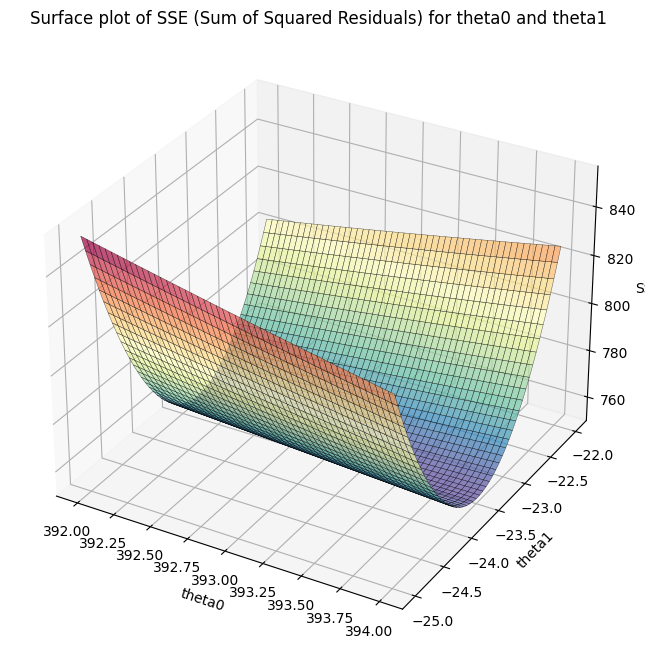

theta0 =  [393.33933934]
theta1 =  [-23.40840841]
cost_function minimum=  751.9062466633302


In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([10.3, 10.3, 10.1, 9.3, 8.4, 7.3, 8.4, 7.9, 7.6, 7.6, 6.9, 7.4, 8.1, 7.0, 6.5, 5.8])
y = np.array([183.8, 183.2, 174.9, 173.5, 172.9, 173.2, 173.2, 169.7, 174.5, 177.9, 188.1, 203.2, 230.2, 258.2, 309.8, 329.8])

# sum of squared residuals (SSE)
def cost_function(xdata, ydata, theta0, theta1):
  n = len(x)
  sum = 0
  for i in range(0, n):
    residual = (theta0 + theta1 * xdata[i] - ydata[i])**2
    sum = sum + residual
  return sum/(2*n)
    
theta0, theta1 = np.meshgrid(np.linspace(392, 394, 1000), np.linspace(-25, -22, 1000))

z = cost_function(x, y, theta0, theta1)

# z = [[27339.64       27338.73275682 27337.8256419  ... 26498.79861487  26498.01924331 26497.24      ]
#     [27328.42324586 27327.51755258 27326.61198755 ... 26489.12710928  26488.34928762 26487.57159421]
#     [27317.22571617 27316.32157278 27315.41755766 ... 26479.47482814  26478.69855637 26477.92241286]
#     ...
#     [25701.59073118 25702.22873655 25702.86687018 ... 26401.36215225 26402.12802924 26402.89403448]
#     [25709.54075337 25710.18030864 25710.81999216 ... 26410.85742299 26411.62484987 26412.39240502]
#     [25717.51       25718.15110517 25718.79233859 ... 26420.37191817 26421.14089496 26421.91     ]]

fig = plt.figure(figsize =(8, 8)) 
ax = plt.axes(projection ='3d') 

surf = ax.plot_surface(theta0, theta1, z, cmap = 'Spectral_r', alpha = 0.7, linewidth = 0.3, edgecolor = 'black') 

plt.title("Surface plot of SSE (Sum of Squared Residuals) for theta0 and theta1")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('SSE')

plt.show() 

# Now find the min value on this surface
zmin = z.min()
min_index = np.where(z==zmin)
theta0_min = theta0[min_index]
theta1_min = theta1[min_index]
print("theta0 = ", theta0_min)
print("theta1 = ", theta1_min)
print("cost_function minimum= ", zmin)

Now evaluate the minima using gradient descent

In [32]:
import numpy as np


def gradient_descent(xdata, 
                     ydata, 
                     initial_theta0, 
                     initial_theta1, 
                     learning_rate, 
                     partial_derivative_cost_function_theta0, 
                     partial_derivative_cost_function_theta1, 
                     iterations):
  
  theta0 = initial_theta0
  theta1 = initial_theta1
  
  for i in range(0, iterations):
    theta0 = theta0 - learning_rate * partial_derivative_cost_function_theta0(xdata, ydata, theta0, theta1)
    theta1 = theta1 - learning_rate * partial_derivative_cost_function_theta1(xdata, ydata, theta0, theta1)
    
  return (theta0, theta1)


def partial_derivative_cost_function_theta0(xdata, ydata, theta0, theta1):
  sum = 0
  for i in range(0, len(xdata)):
    sum = sum + (theta0 + theta1 * xdata[i] - ydata[i])
    
  return sum/len(xdata)


def partial_derivative_cost_function_theta1(xdata, ydata, theta0, theta1):
  sum = 0
  for i in range(0, len(xdata)):
    sum = sum + xdata[i] * (theta0 + theta1 * xdata[i] - ydata[i])
    
  return sum/len(xdata)


def cost_function(xdata, ydata, theta0, theta1):
  sum = 0
  for i in range(0, len(xdata)):
    sum = sum + (theta0 + theta1 * xdata[i] - ydata[i])**2
    
  return sum/(2*len(xdata))


initial_theta0 = 390
initial_theta1 = -21

learning_rate = 0.01
iterations = 100000

x = np.array([10.3, 10.3, 10.1, 9.3, 8.4, 7.3, 8.4, 7.9, 7.6, 7.6, 6.9, 7.4, 8.1, 7.0, 6.5, 5.8])
y = np.array([183.8, 183.2, 174.9, 173.5, 172.9, 173.2, 173.2, 169.7, 174.5, 177.9, 188.1, 203.2, 230.2, 258.2, 309.8, 329.8])

minimum_value = gradient_descent(x, y, initial_theta0, initial_theta1, learning_rate, partial_derivative_cost_function_theta0, partial_derivative_cost_function_theta1, iterations)
theta0_min = minimum_value[0]
theta1_min = minimum_value[1]
print('theta0 = ', theta0_min)
print('theta1 = ', theta1_min)
print('cost function minima= ', cost_function(x, y, theta0_min, theta1_min))

theta0 =  393.3486162675706
theta1 =  -23.409448101483125
cost function minima=  751.9062453306153
